# U8 - Abdullah Barhoum (5041774), Katharina Müller (5284090)


# Assignment 8

## Ex. 8.0
We start by installing pytorch, a popular machine learning framework. Go to [pytorch.org](https://pytorch.org/), choose your target system and install pytorch (via conda).

You can try pytorch on [Google Colab](https://colab.research.google.com), too. Colab integrates with your Google account, your notebooks will be stored on Google Drive and you can read datasets from there too. You can even use GPUs and TPUs! However, we still suggest you install pytorch on your local computer because variables might get lost when your computer disconnects from the internet or the notebook runs idle for a while.  

Browse through the [pytorch tutorials ](https://pytorch.org/tutorials/), they often come as colab notebooks - go and execute some!

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim

from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

torch.manual_seed(1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## Ex. 8.1
Make your own convolutionnal network of the following structure : 3 layer of convolution and 2 layer of neurones. We would like to see in it some padding, stride, pooling, drop out and batch normalization. Use the ReLU activation fonction. You should define your network, make a train fonction, a test fonction to display the result and make them work!

Setup some hyper-parameter for your network, Now, load MNIST from torch and 

In [2]:
batch_size = 32

train_data = MNIST('./data', train=True, download=True, transform=ToTensor())
test_data = MNIST('./data', train=False, download=True, transform=ToTensor())

train_loader = DataLoader(train_data, batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size)

Display some instance of the training set

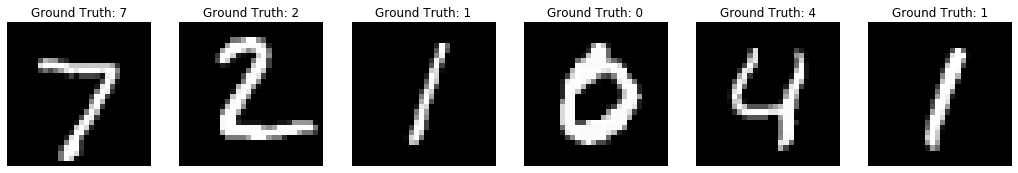

In [3]:
_, (example_data, example_targets) = next(enumerate(test_loader))

plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.axis(False)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title("Ground Truth: {}".format(example_targets[i]))
plt.show()

In [4]:
def create_model():
    return nn.Sequential(nn.Conv2d(1, 8, 3), 
                         nn.BatchNorm2d(8),
                         nn.MaxPool2d(2),
                         nn.ReLU(), 
                         nn.Dropout2d(0.1),
                         
                         nn.Conv2d(8, 32, 3),
                         nn.BatchNorm2d(32), 
                         nn.MaxPool2d(2), 
                         nn.ReLU(),
                         nn.Dropout2d(0.1),
                         
                         nn.Conv2d(32, 64, 3),
                         nn.BatchNorm2d(64),
                         nn.MaxPool2d(2), 
                         nn.ReLU(),
                         nn.Dropout2d(0.1),
                         
                         nn.Flatten(),
                         nn.Linear(64, 64),
                         nn.ReLU(), 
                         nn.Linear(64, 10),
                         nn.LogSoftmax(1)
                        )

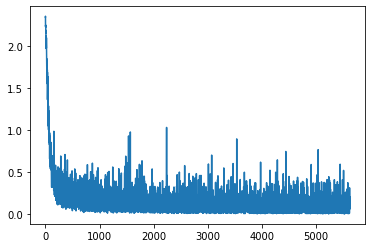

In [5]:
model = create_model().to(device)
optimizer = optim.Adam(model.parameters())

epoch_bar = tqdm(total=3, leave=False)
losses = []
for e in range(3):
    epoch_bar.update(1)
    bar = tqdm(total=len(train_loader), leave=False)
    for i, (images, labels) in enumerate(train_loader):
        bar.update(1)
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        predictions = model(images)
        loss = F.nll_loss(predictions, labels)
        loss.backward()
        losses.append(loss.item())
        bar.set_description(str(round(loss.item(), 2)), False)
        optimizer.step()
    bar.close()
    
epoch_bar.close()
plt.figure()
plt.plot(losses)
plt.show()       

In [6]:
correct = 0
total = len(test_data)
with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        predictions = model(images)
        matches = (torch.argmax(predictions, 1) == labels).sum().item()
        correct += matches
print('Accuracy', correct / total)

Accuracy 0.9773
